In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [68]:
dfm=pd.read_csv('phone.csv')
dfm.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [71]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [73]:
dfm['date']=pd.to_datetime(dfm['date'])

In [75]:
dfm['duration'].describe()

count    820.000000
mean     144.304936
std       45.687777
min        0.993514
25%      112.916486
50%      144.179434
75%      175.932308
max      268.458090
Name: duration, dtype: float64

In [78]:
# month column can be dropped as we already have an existing Date cloumn from which month can be retrevied 
dfm.drop(columns='month',inplace=True)

In [152]:
print(dfm.item.nunique())
print(dfm.item.unique())

3
['data' 'call' 'sms']


In [80]:
print(dfm.network.nunique())
print(dfm.network.unique())

7
['data' 'Vodafone' 'Meteor' 'Tesco' 'Three' 'voicemail' 'landline']


In [81]:
print(dfm.network_type.nunique())
print(dfm.network_type.unique())

4
['data' 'mobile' 'voicemail' 'landline']


<AxesSubplot:xlabel='duration'>

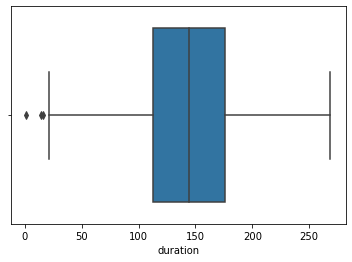

In [83]:
sb.boxplot(data=dfm,x='duration')

In [ ]:
# not many outliers are observed

### a) With 95% & 99% Confidence Interval, Found the range estimate of average duration calls made by the entire network.  Interpreted the results.

In [90]:
# range estimate using formula
n=len(dfm)
x_bar=np.mean(dfm['duration'])
s=np.std(dfm['duration'],ddof=1)
z=stats.norm.isf(0.025)

LL=x_bar-z*s/np.sqrt(n)
UL=x_bar+z*s/np.sqrt(n)

LL,UL

(141.1778397288302, 147.4320313908407)

In [93]:
#range estimate using inbult function
print('range estimate of average duration calls made by the entire network with 95% confidence is:\n',stats.norm.interval(loc=x_bar,scale=s/np.sqrt(n),alpha=0.95))
print()
print('range estimate of average duration calls made by the entire network with 99% confidence is:\n',stats.norm.interval(loc=x_bar,scale=s/np.sqrt(n),alpha=0.99))


range estimate of average duration calls made by the entire network with 95% confidence is:
 (141.1778397288302, 147.4320313908407)

range estimate of average duration calls made by the entire network with 99% confidence is:
 (140.19523500408818, 148.41463611558274)


In [ ]:
INFERENCE:
# The range estimate with 99% confidence has the largest range i.e, 140.19 to 148.41 
# when comapred to The range estimate with 99% confidence i.e,141.1778397288302 to 147.4320313908407
# It implies that, we can confidently say that the population mean for duration lies with in the range with 99% than 95% confidence interval.

### b) Performed statistical analysis to check whether the networks are equally distributed in the dataset.

In [94]:
# Network is a categorical column
print(dfm.network.nunique())
print(dfm.network.unique())

7
['data' 'Vodafone' 'Meteor' 'Tesco' 'Three' 'voicemail' 'landline']


In [ ]:
# Hypthesis Formation
# Ho: Observed = Expected (Equally distributed)
# Ha: Observed != Expected (UnEqually distributed)

In [95]:
dfm.network.value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [99]:
len(dfm)

820

In [124]:
# In order to consider network equally distributed, each should have equal percentage share
per=(len(dfm)/7)/len(dfm)*100

expected_value=np.array([per,per,per,per,per,per,per])*len(dfm)
observed_value=dfm.network.value_counts().values

stats.chisquare(f_obs=observed_value,f_exp=expected_value)

Power_divergenceResult(statistic=80371.27409756096, pvalue=0.0)

In [ ]:
INFERENCE:
# Pvalue =0.0
# siglvl = 0.05
# Pvalue<siglvl, hence, Ho is rejected, Ha is selected
# Implies, the networks are unequally distributed in the dataset.

### c) Plotted the distribution of duration with respect to each network in the same graph and interpreted the results from the graph.

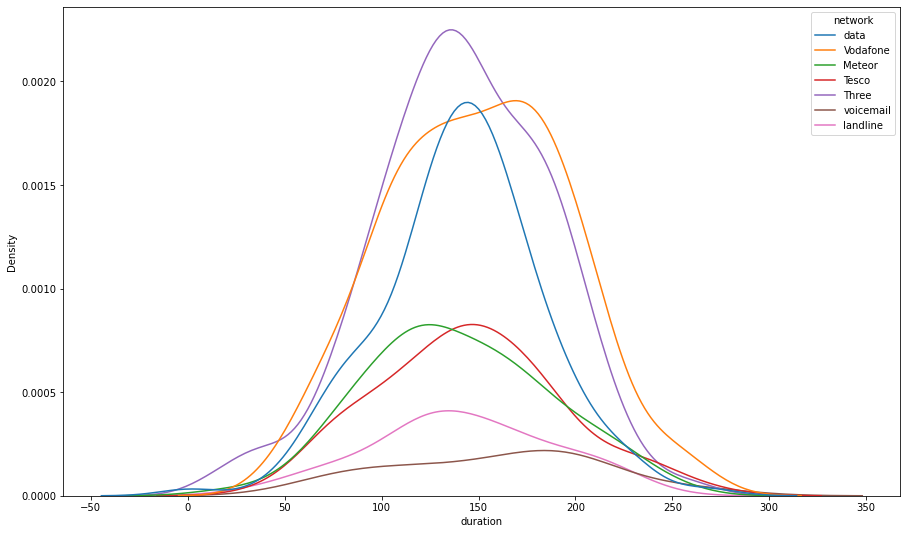

In [148]:
plt.figure(figsize=(15,9))
sb.kdeplot(data=dfm,x='duration',hue='network')
plt.show()

In [ ]:
INFERENCE:
# From the above graph, we can observe that, the duration with different network is normally distributed.
# And it is also observed that, their MEANs are closed. It implies, the average network usage duration is more or less equal
# among various networks.

### d)	Performed statistical tests to identify the relation between item and duration. Detailed relation explained

In [153]:
print(dfm.item.nunique())
print(dfm.item.unique())

3
['data' 'call' 'sms']


In [156]:
#item is categorical 
#duration is numerical 

# ANOVA test

#hypothesis formation
# Ho: When all MEANs of duration are equal (There is no effect/ no relation)
# Ha: When any of the MEANs of duration are not equal (There is effect/ relation)

item_data=dfm[dfm['item']=='data']['duration']
item_call=dfm[dfm['item']=='call']['duration']
item_sms=dfm[dfm['item']=='sms']['duration']

stats.f_oneway(item_data,item_call,item_sms)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [ ]:
INFERENCE:
#Pvalue = 0.14
#Siglvl = 0.05
# Pvalue>siglvl, hence, Ho is selected
# Implies there is no effect/ no relation of item with Duration

### e)	Performed statistical tests to identify the relation between network and network_type. 

In [ ]:
# Network and network type are categorical

In [157]:
print(dfm.network.nunique())
print(dfm.network.unique())

7
['data' 'Vodafone' 'Meteor' 'Tesco' 'Three' 'voicemail' 'landline']


In [158]:
print(dfm.network_type.nunique())
print(dfm.network_type.unique())

4
['data' 'mobile' 'voicemail' 'landline']


In [161]:
# Chisquare test of independence

#Hypothesis formation

# Ho : The columns are independent (no effect)
# Ha : The columns are dependent (effect)

Net=pd.crosstab(dfm['network'],dfm['network_type'])
Net

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [162]:
stats.chi2_contingency(Net)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [ ]:
INFERENCE:
# Pvalue=0.0
# siglvl=0.05
# pvalu<siglvl, hence Ho is rejected, Ha is selected
# There is a relation between network and network_type.